In [42]:
import pickle
import random
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
from sklearn import naive_bayes, metrics

with open('test_dicts.txt', 'rb') as file:
    test_lemmedreviews = pickle.load(file)
    
with open('training_dicts.txt', 'rb') as file:
    train_lemmedreviews = pickle.load(file)

In [14]:
candidate_features = Counter()

for p in range(1, 6):
    for rev in train_lemmedreviews[p]:
        for w in rev:
            if w.split("-")[-1] in ["ADJ", "ADV", "NEGATION"]:
                candidate_features[w] += 1


print("candidate features:", len(candidate_features))

candidate features: 1507


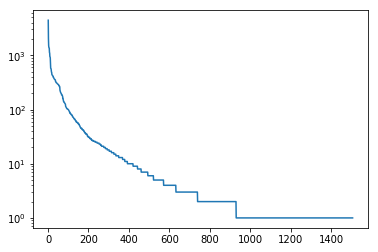

In [15]:
x = np.arange(1, len(candidate_features) + 1)
y = np.array([v for _, v in candidate_features.most_common()])

plt.plot(x, y)
plt.yscale('log') 
plt.show()

In [29]:
features = dict()

for idx, (f, v) in enumerate(candidate_features.most_common()):
    if v == 9:
    #    print(idx, f, v)
        break

    features[f] = idx
    
print("selected features:", len(features))

selected features: 420


In [40]:
fMat = np.zeros((sum([len(v) for v in train_lemmedreviews.values()]), len(features)))
labelsVec = np.zeros((sum([len(v) for v in train_lemmedreviews.values()])))

docId = 0
for score in range(1, 6):
    for rev in train_lemmedreviews[score]:
        labelsVec[docId] = score
        
        for word in rev:
            if word in features:
                fMat[docId, features[word]] += 1

        docId += 1
        
print(fMat, labelsVec)

[[2. 3. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]] [1. 1. 1. ... 5. 5. 5.]


In [44]:
clf = naive_bayes.MultinomialNB()
clf.fit(fMat, labelsVec)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [46]:
testMat = np.zeros((sum([len(v) for v in test_lemmedreviews.values()]), len(features)))
goldStandard = np.zeros((sum([len(v) for v in test_lemmedreviews.values()])))

docId = 0
for score in range(1, 6):
    for rev in test_lemmedreviews[score]:
        goldStandard[docId] = score

        for word in rev:
            if word in features:
                testMat[docId, features[word]] += 1

        docId += 1

In [47]:
predicted = clf.predict(testMat)

In [52]:
# accuracy
print("accuracy:", metrics.accuracy_score(predicted, goldStandard))

print(predicted[:10])
print(goldStandard[:10])

accuracy: 0.659
[4. 5. 5. 5. 4. 1. 1. 1. 1. 5.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [54]:
# precision, recall and f-measure
print("precision:", metrics.precision_score(predicted, goldStandard, average='macro'))


print("recall:", metrics.recall_score(predicted, goldStandard, average='macro'))

print("f1-measure:", metrics.f1_score(predicted, goldStandard, average='macro'))

precision: 0.3888447463528511
recall: 0.47690088739247527
f1-measure: 0.4014620322982334
